# Wine Quality Classification Prediction and Analysis

**Authors:** Ruthy Yao
***

![Banner](./images/Banner.PNG)

## Overview

This project aims to help Riverwood Wine, which makes five to eight red wine products each year, to proactively manage the quality of their red wine products. Predicative analysis on the classification of wine quality between "high-quality" and "low-quality" wines shows that alcohol,sulphates,volatile acidity,density and total sulfur dioxide are the most important factors that contribute to a high-quality wine. The project specified a range for each of the parameters. On top of that, Riverwood Wine can use this predictive model to adjust their sales and marketing efforts to improve the resources allocation. 


## Business Problem

Riverwood Wine is a renowed winemaker in the industry. Every year, they participate in the industry rating and award. Wining the award will greatly enhance their brand value and boost their sales. 

Historically, at least three of their products would get the "Spectatular Wine" award. However, in recent years, their wins became very unpredictable - in some years, none of their wines got an award. The leadership team would like to have a better understand from the physiochemical properties perspective, what makes a 'great" wine. With thsoe insights, Riverwood Wine can proactively manage the fermentation process - better control over the quality of their product and increase the chances of winning the industry award. Furthermore, they would like to self assess their products so they can allocate their sales and marketing budget to the best products.


## Exploratory Data Analysis

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

In [9]:
data = pd.read_csv('data/winequality-red.csv')

In [10]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


There are 1599 data entries. no missing value.

In [13]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


Some obervations from the data:
* Features are in different scales.
* `quality` is rated from 3 to 8 with majority of the wines in rate 5 and 6.
* There are some extremely large values in the variables `free sulfur dioxide`, `total sulfur dioxide`.

### Univariate Analysis

In [16]:
columns = pd.Series(data.columns)

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

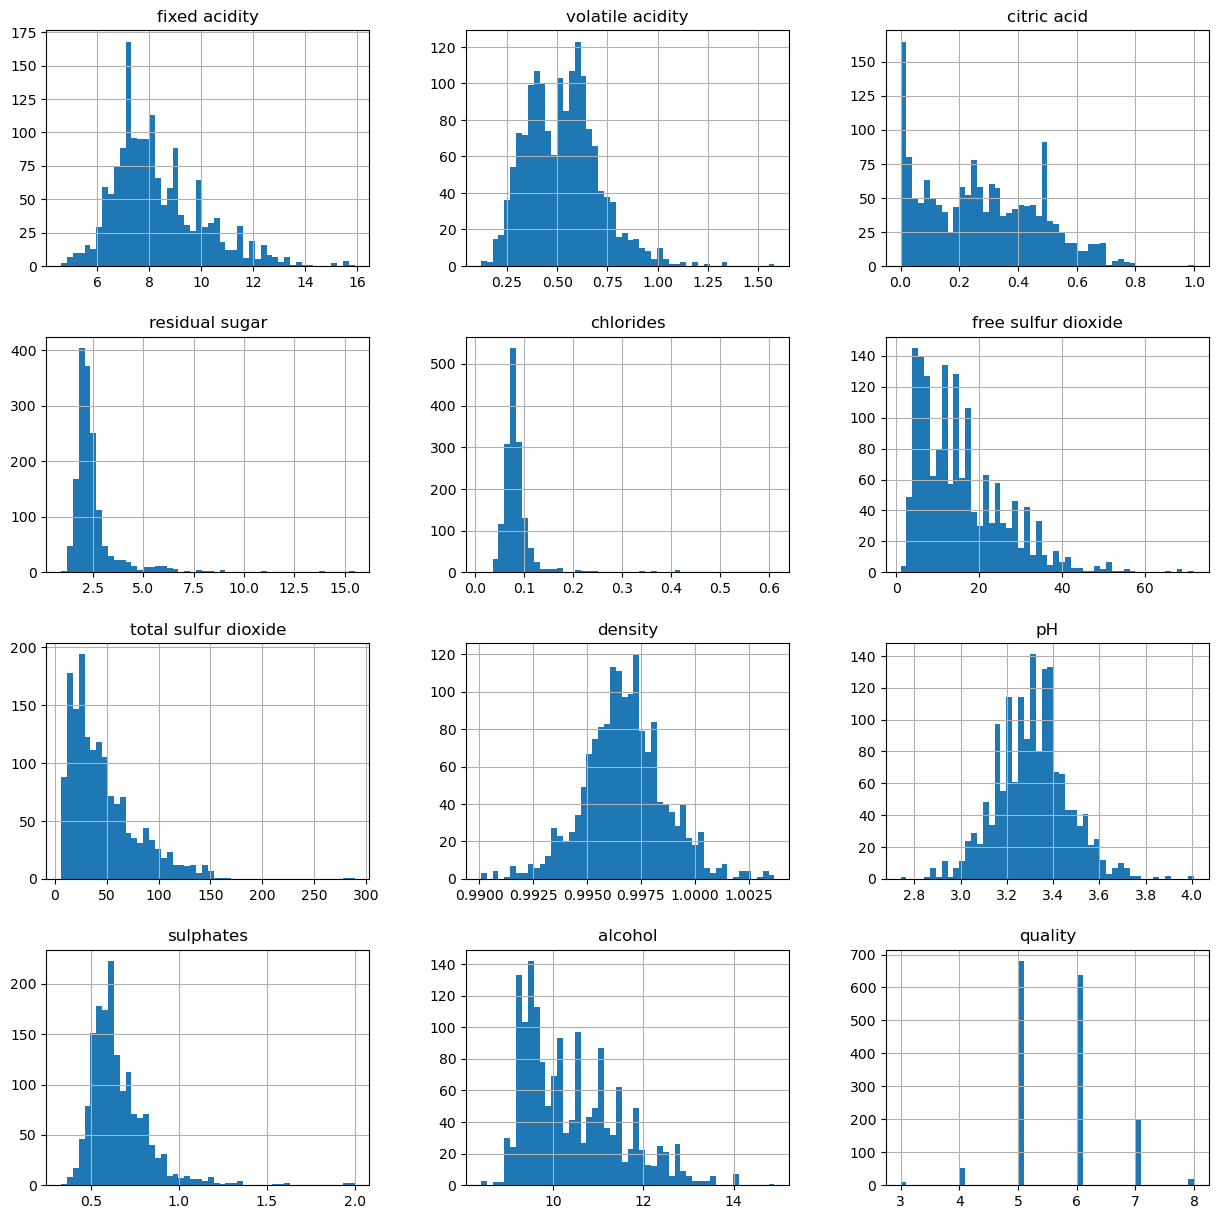

In [17]:
data[columns].hist(bins = 50, figsize  = [15, 15])

Some observations from the plots:
* Most features (other than `density` and `pH`) shows strong skewness.
* Some features have long tails, such as `residual sugar`, `chlorides`.

### Bivariate Analysis

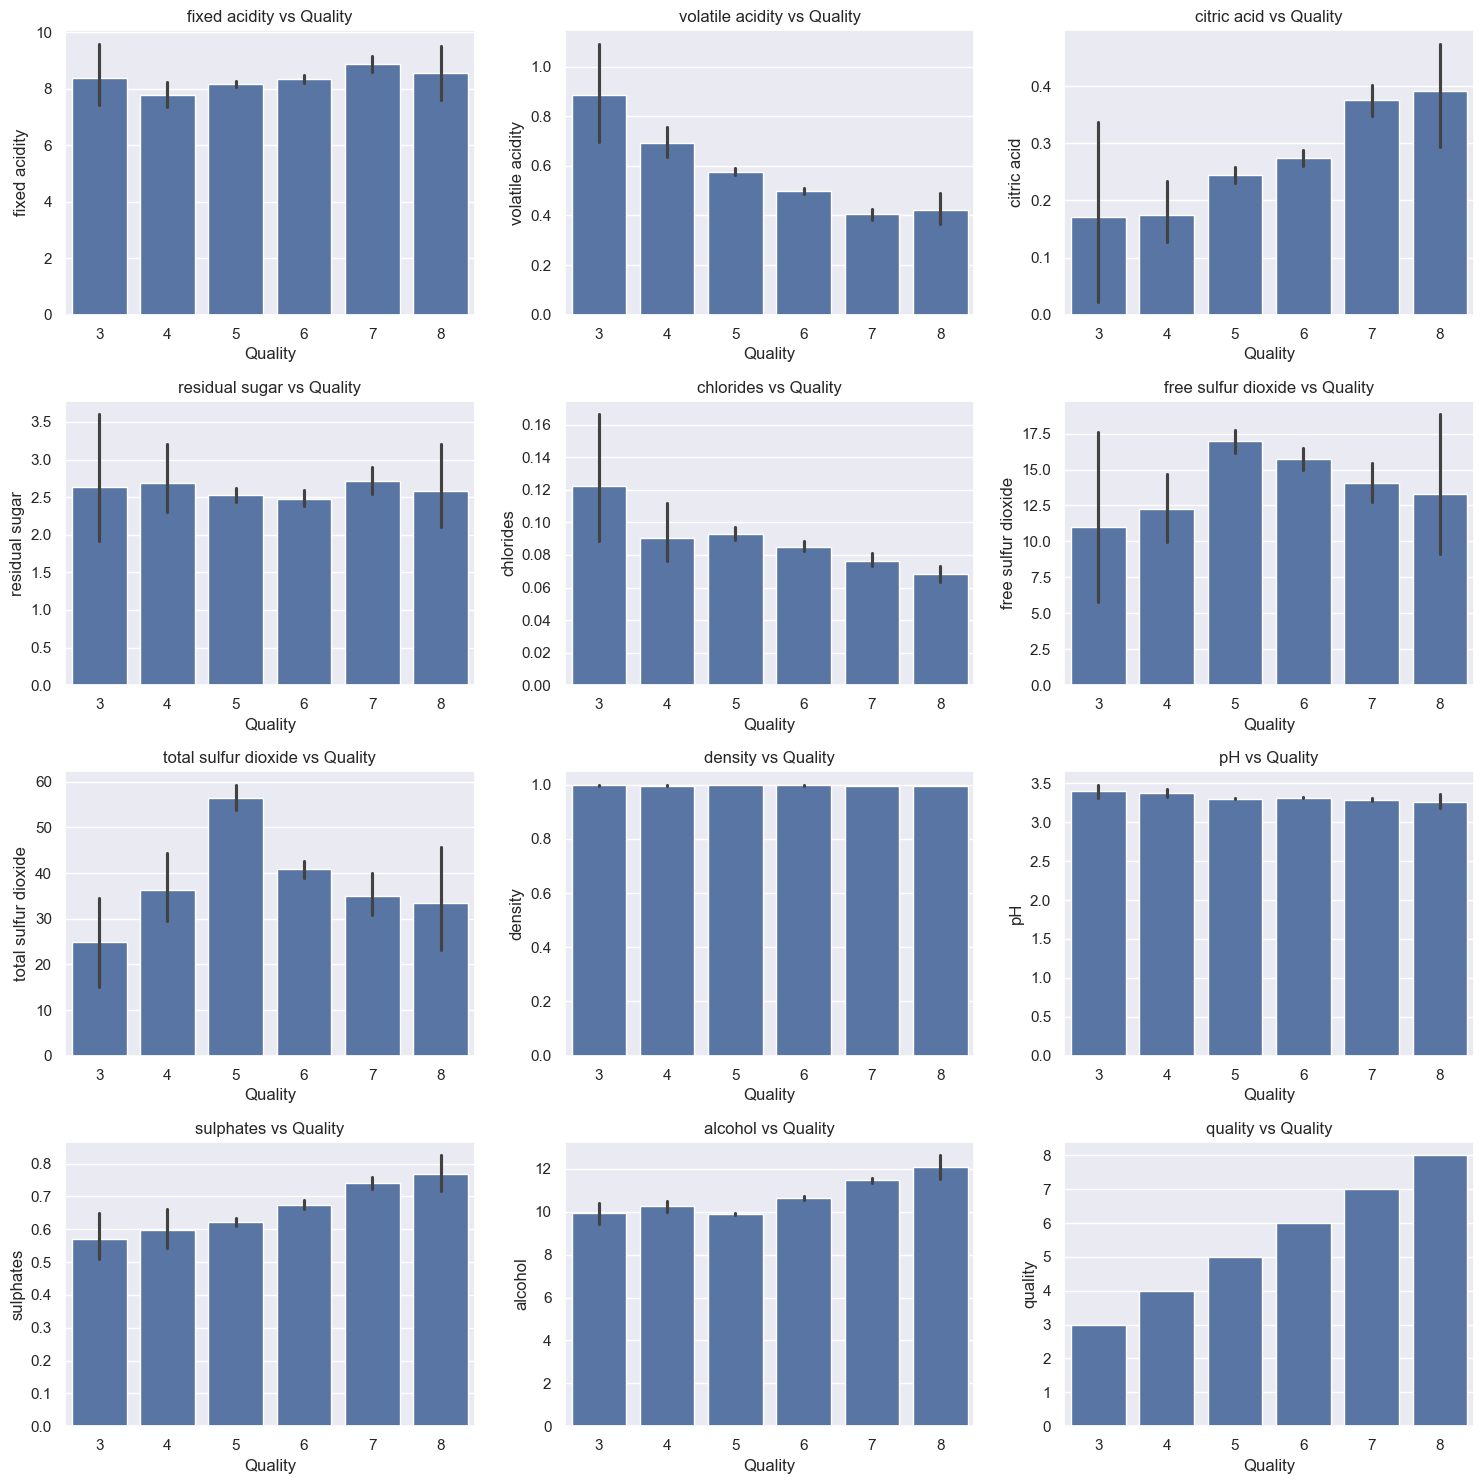

In [20]:
sns.set_theme(color_codes=True)
fig,ax = plt.subplots(nrows = 4,ncols = 3,figsize =(15,15))
ax = ax.flatten()
for i,col in enumerate(columns):
    sns.barplot(data=data,y=col,x="quality",ax=ax[i])
    ax[i].set_title(f"{col} vs Quality")
    ax[i].set_xlabel('Quality')
    ax[i].set_ylabel(f"{col}")
    #ax[i].set_ylim(max(data[col]),average(data[col]*1.5))
plt.tight_layout()
plt.show()

Some key insights from the plots:
* High quality wines tend to have high citric acid, high sulphates and alcohol, but low volatile acidity and lower chloride.
* For some features, such as `fixed acidity`, `residual sugar`, `free sulfur dioxide` and `total sulfur dioxide`, there is no clear correlation with the wine quality. Further analysis is needed. 

In [22]:

#sns.pairplot(data=data, hue="quality", diag_kind = "hist")
#pd.plotting.scatter_matrix(data, figsize=[15, 15]);

In [23]:
#!pip install seaborn --upgrade

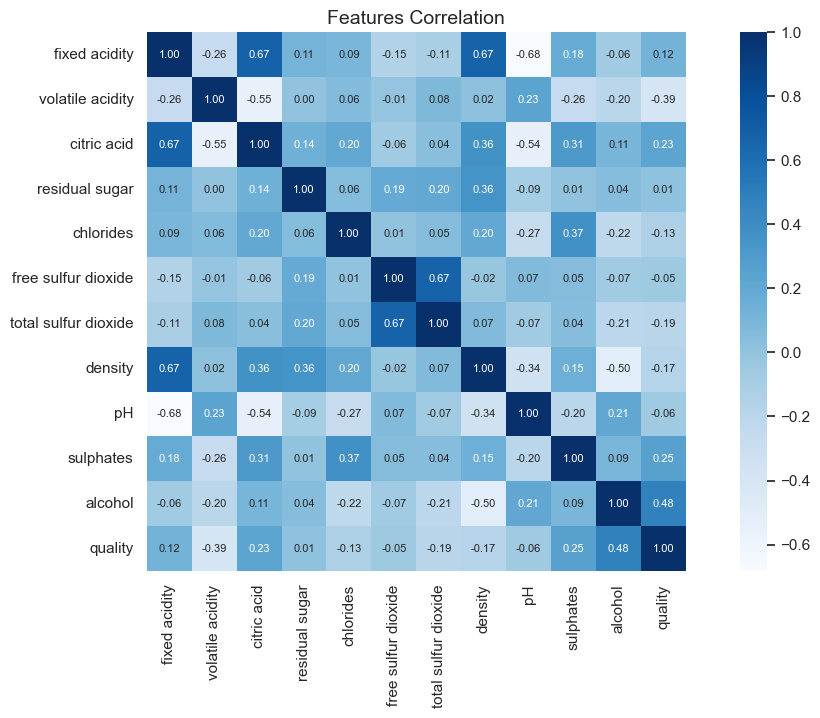

In [24]:
#import seaborn as sns
corr_matrix = data.corr()
plt.figure(figsize=(14,7))
heatmap = sns.heatmap(corr_matrix, cbar = True, square=True, fmt = ".2f", annot = True,
           annot_kws = {"size":8}, cmap = "Blues")
heatmap.set_title('Features Correlation', fontsize=14)
plt.savefig('./Images/Features_corr.png', bbox_inches='tight');

Some observations from the correlation heatmap:
* If we use +/-0.6 as a threshhold for strong correlation, there isn't any feature that has strong correlation with the wine quality. Despite of this, `alcohol`,`sulphates`, `citric acid` have the highest postive correlation, whereas `volatile acidity`, `total sulfur dioxide` and `density` have the strongest negative correlation. 
* Some features are correlated with each other. For example, `fixed acidity` with `density`, `chlorides` with `sulphates`.

## Model Development

### Model 1 - Logistic Regression
Build a linear regresion model to predict the quality score and evaluate the model fit.

#### Data Preparation

To solve the the business poroblem of predicting a high-quality wine, I will classify the data into two categories - "high-quality" and "low-quality". the `quality` score of 7 will be used as the threshold. For wines with a `quality` score 7 or above will be classified as "high-quality" and below 7 will be classified as "low-quality".

In [30]:
# convert the quality score to a boolean value with 1 representing 'high-quality' wines and 0 representing a'midiocre' or 'low-quality' wines.
data["quality"] = [1 if x >= 7 else 0 for x in data["quality"]]

In [31]:
data = shuffle(data, random_state = 42)

In [32]:
data['quality'].value_counts(normalize = True)

quality
0    0.86429
1    0.13571
Name: proportion, dtype: float64

The data is not balanced - 86% of the products are "low-quality".

##### Deal with outliers

In [35]:
# By looking at the mean and max value, we think potentially only `free sulfur dioxide` and `total sulfur dioxide` have outliers
outlier_columns = ['free sulfur dioxide','total sulfur dioxide']

In [36]:
# Boxplot approach

for col in outlier_columns:

    lower_quartile = data[col].quantile(0.25)
    upper_quartile = data[col].quantile(0.75)
    iqr = upper_quartile - lower_quartile
    iqr_extended = iqr * 2
    min_border = lower_quartile - iqr_extended
    max_border = upper_quartile + iqr_extended

    outliers = data[(data[col] < min_border) | (data[col] > max_border)].index
    print(f'{len(outliers)} outliers detected in column {col}')

    data_for_model = data.drop(outliers)

18 outliers detected in column free sulfur dioxide
23 outliers detected in column total sulfur dioxide


In [37]:
# Split input variables and output variables
X = data_for_model.drop(['quality'], axis =1)
y = data_for_model['quality']

In [38]:
# Initiate train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42,stratify = y)

#### Feature Selection

In [40]:
clf = LogisticRegression(random_state = 42, max_iter = 1000)
feature_selector = RFECV(clf)

In [41]:
fit = feature_selector.fit(X_train,y_train)

In [42]:
optimal_feature_count = feature_selector.n_features_
print(f'Optimal number of features: {optimal_feature_count}')

Optimal number of features: 9


In [43]:
X_train = X_train.loc[:, feature_selector.get_support()]
X_test = X_test.loc[:, feature_selector.get_support()]

In [44]:
X_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,density,pH,sulphates,alcohol
595,8.9,0.595,0.41,7.9,0.086,0.99980,3.27,0.57,9.3
787,10.0,0.560,0.24,2.2,0.079,0.99910,3.18,0.56,10.1
1040,7.4,0.965,0.00,2.2,0.088,0.99756,3.58,0.67,10.2
310,10.3,0.530,0.48,2.5,0.063,0.99980,3.12,0.59,9.3
1469,7.3,0.980,0.05,2.1,0.061,0.99705,3.31,0.55,9.7


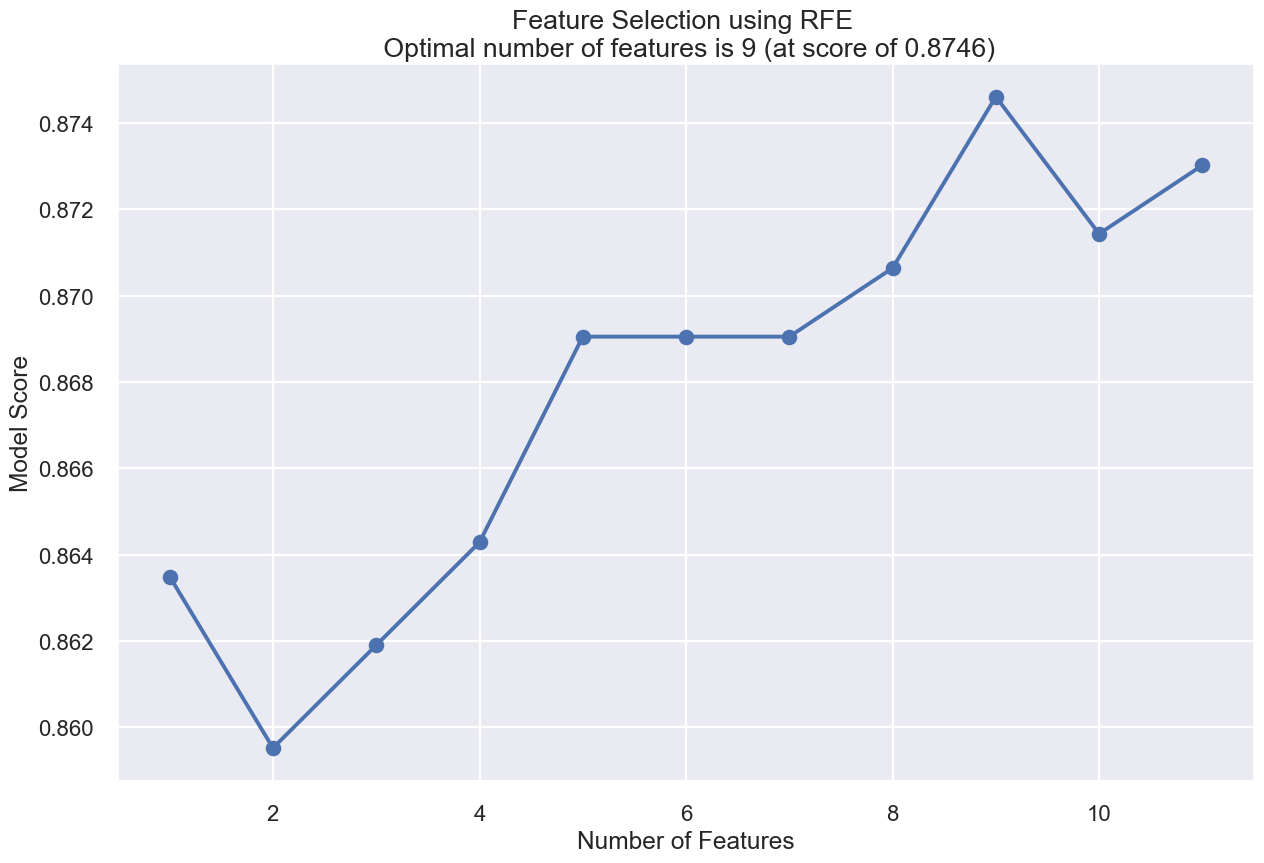

In [170]:
plt.plot(range(1, len(fit.cv_results_['mean_test_score']) + 1), fit.cv_results_['mean_test_score'], marker = "o")
plt.ylabel("Model Score")
plt.xlabel("Number of Features")
plt.title(f"Feature Selection using RFE \n Optimal number of features is {optimal_feature_count} (at score of {round(max(fit.cv_results_['mean_test_score']),4)})")
plt.tight_layout()
plt.savefig('./Images/optimal_num_features.png', bbox_inches='tight');
plt.show()

The optimal number of features are 9. `free sulfur dioxide` and `total sulfur dioxide` are elimiated.

#### Model Training

In [48]:
clf =LogisticRegression(random_state = 42, max_iter = 1000)
clf.fit(X_train,y_train)

LogisticRegression(max_iter=1000, random_state=42)

#### Model Assessment

In [50]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

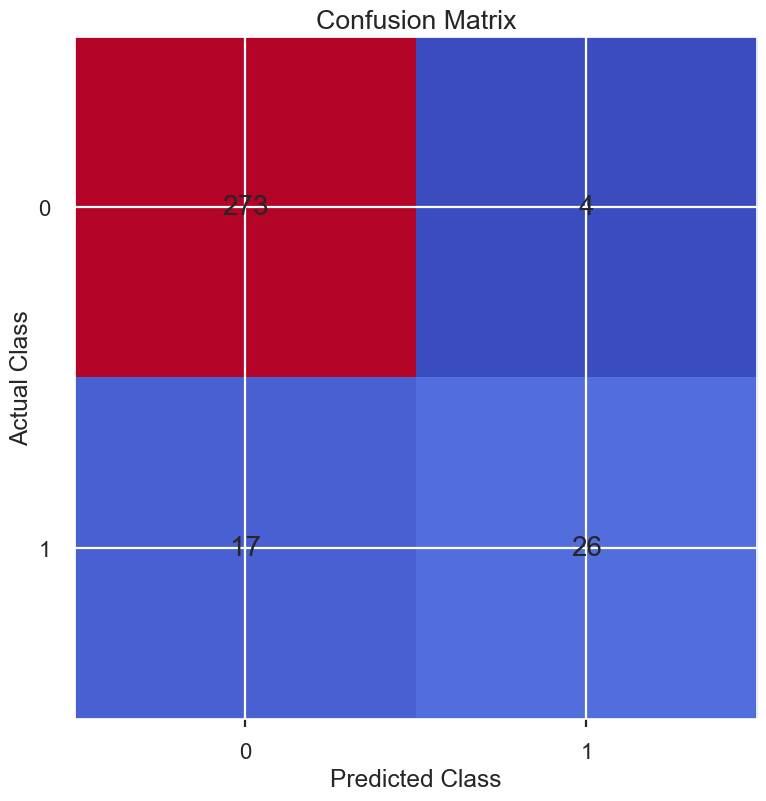

In [168]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.style.use("seaborn-v0_8-poster")
plt.matshow(conf_matrix, cmap = 'coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title('Confusion Matrix')
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha = 'center', va = 'center', fontsize = 20)
plt.savefig('./Images/conf_matrix_logistic.png', bbox_inches='tight');
plt.show()

In [52]:
def cal_score(ytest,ypred):
    accuracy = round(accuracy_score(ytest,ypred),4)
    precision = round(precision_score(ytest,ypred),4)
    recall = round(recall_score(ytest,ypred),4)
    f1 = round(f1_score(ytest,ypred),4)

    result = [accuracy, precision, recall, f1]
    return result

In [53]:
scores = cal_score(y_test, y_pred_class)
score_name = ['Accuracy Score','Precision Score','Recall Score', 'F1 Score']
scorecard = pd.DataFrame(scores,score_name).transpose()
scorecard

,Accuracy Score,Precision Score,Recall Score,F1 Score
0,0.8797,0.619,0.3023,0.4062


As the data is not balanced with 86% of the wines not reaching the "quality" level, accuracy score is not the best measure. F1 score would be a better measurement for evaluating the model.

0.40 is not a very high score, we should consider building other models.

##### Finding the Optimal threshold

In [56]:
thresholds = np.arange(0,1,0.01)

precision_scores =[]
recall_scores =[]
f1_scores =[]

for threshold in thresholds:
    
    pred_class = (y_pred_prob >= threshold) * 1
    
    precision = precision_score(y_test,pred_class, zero_division = 0)
    precision_scores.append(precision)

    recall = recall_score(y_test,pred_class)
    recall_scores.append(recall)

    f1 = f1_score(y_test,pred_class)
    f1_scores.append(f1)

max_f1 = max(f1_scores)
max_f1_idx = f1_scores.index(max_f1)

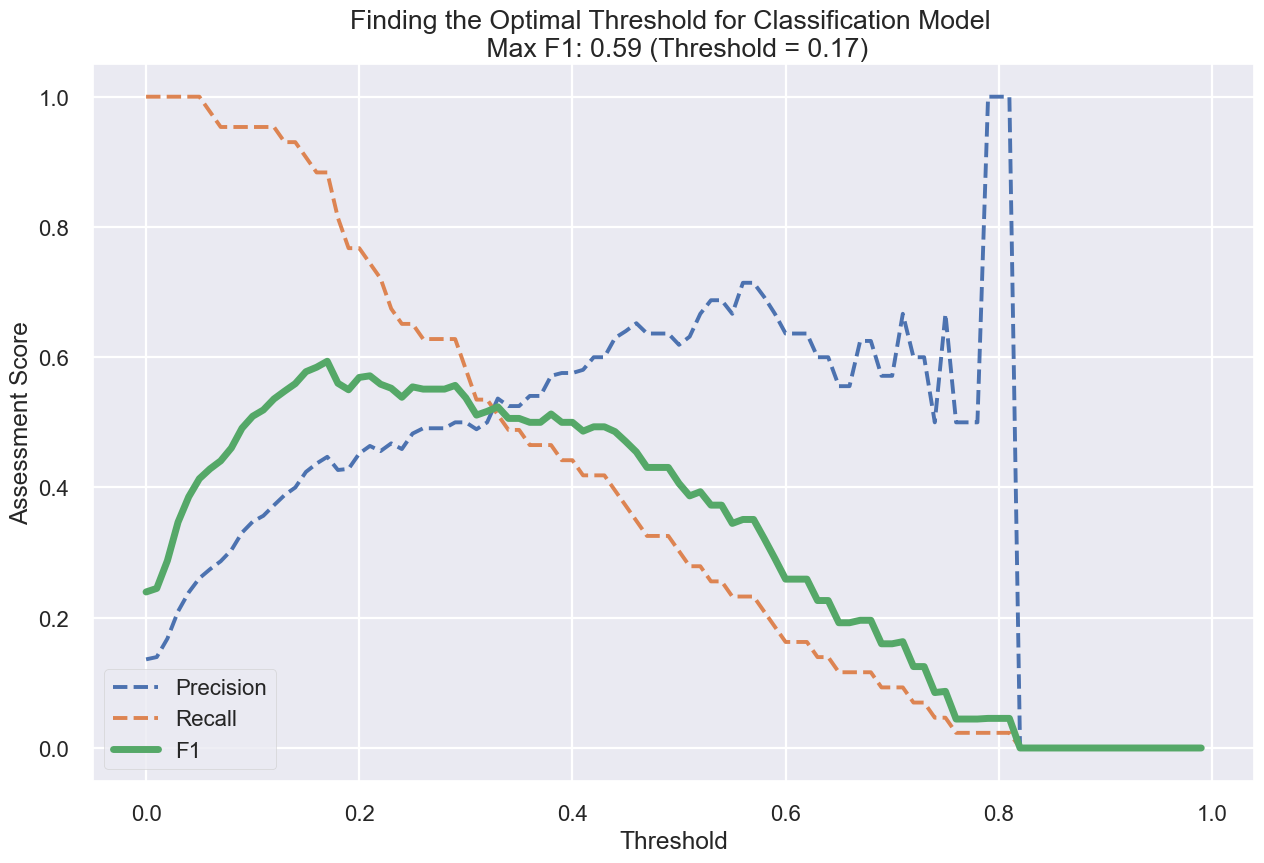

In [166]:
plt.style.use('seaborn-v0_8-poster')
plt.plot(thresholds, precision_scores, label = 'Precision', linestyle = '--')
plt.plot(thresholds, recall_scores, label = 'Recall', linestyle = '--')
plt.plot(thresholds, f1_scores, label = 'F1', linewidth = 5)
plt.title(f"Finding the Optimal Threshold for Classification Model \n Max F1: {round(max_f1,2)} (Threshold = {round(thresholds[max_f1_idx],2)})")
plt.xlabel('Threshold')
plt.ylabel('Assessment Score')
plt.legend(loc = 'lower left')
plt.tight_layout()
plt.savefig('./Images/optimal_threshold.png', bbox_inches='tight');
plt.show()

The best F1 score is 0.59 if setting the probability threshold to 0.17. i.e. Based the various parameters of a wine, if the predicted probability to be a high-quality wine is 0.17 or above, the model will classify the wine as "High-quality".

Let's trian other models to see if we can imrpvoe the quality of the prediction.

### Model 2 - Decision Tree

For Decision Tree model, we don't need to consoider the impact from outliers.

In [61]:
# Split input variables and output variables
X = data.drop(['quality'], axis =1)
y = data['quality']

In [62]:
# Initiate train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42,stratify = y)

#### Model Training

In [64]:
clf =DecisionTreeClassifier(random_state = 42, max_depth = 5)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

#### Model Assessment

In [66]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

In [67]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

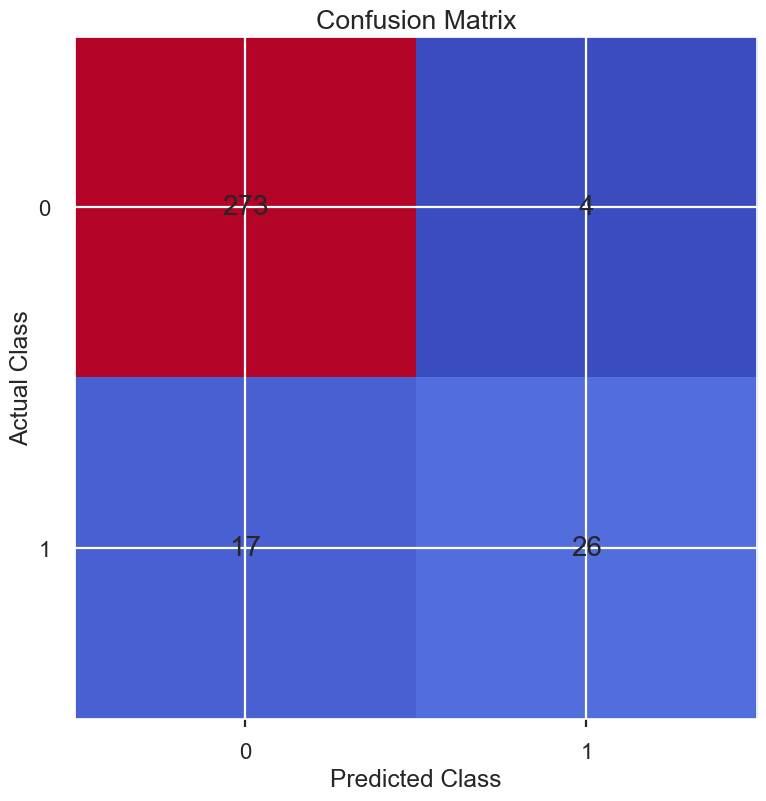

In [164]:
plt.style.use("seaborn-v0_8-poster")
plt.matshow(conf_matrix, cmap = 'coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title('Confusion Matrix')
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha = 'center', va = 'center', fontsize = 20)
plt.savefig('./Images/conf_matrix_tree.png', bbox_inches='tight');
plt.show()

In [69]:
scores = cal_score(y_test, y_pred_class)
scorecard.loc[len(scorecard)] = scores
scorecard

,Accuracy Score,Precision Score,Recall Score,F1 Score
0,0.8797,0.619,0.3023,0.4062
1,0.9094,0.750,0.4884,0.5915


Decision tree model performs better in all the scores.

##### Find the best max_depth

In [72]:
max_depth_list = list(range(1,15))
accuracy_scores = []

for depth in max_depth_list:
    
    clf = DecisionTreeClassifier(max_depth = depth, random_state = 42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = f1_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

max_accuracy = max(accuracy_scores)
max_accuracy_idx = accuracy_scores.index(max_accuracy)
optimal_depth = max_depth_list[max_accuracy_idx]

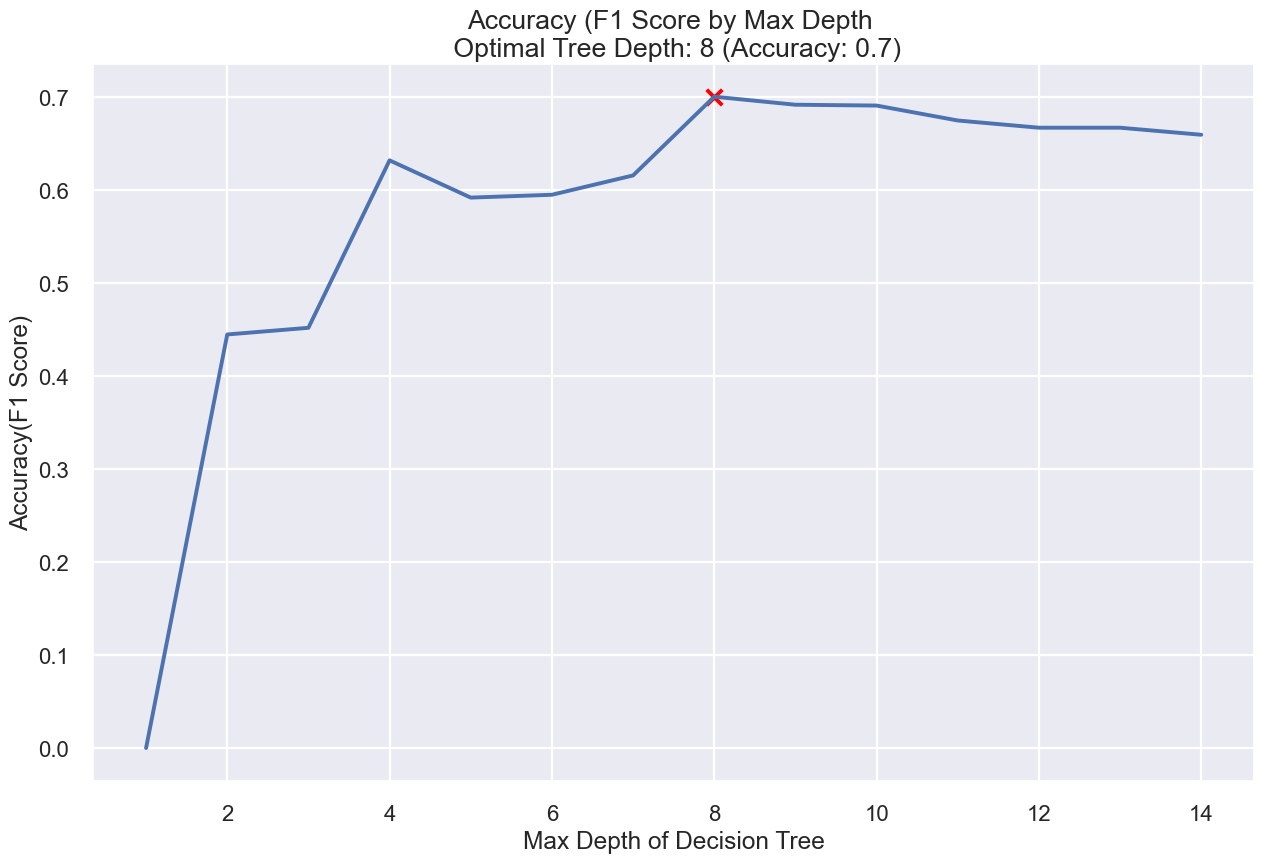

AttributeError: 'RandomForestClassifier' object has no attribute 'tree_'

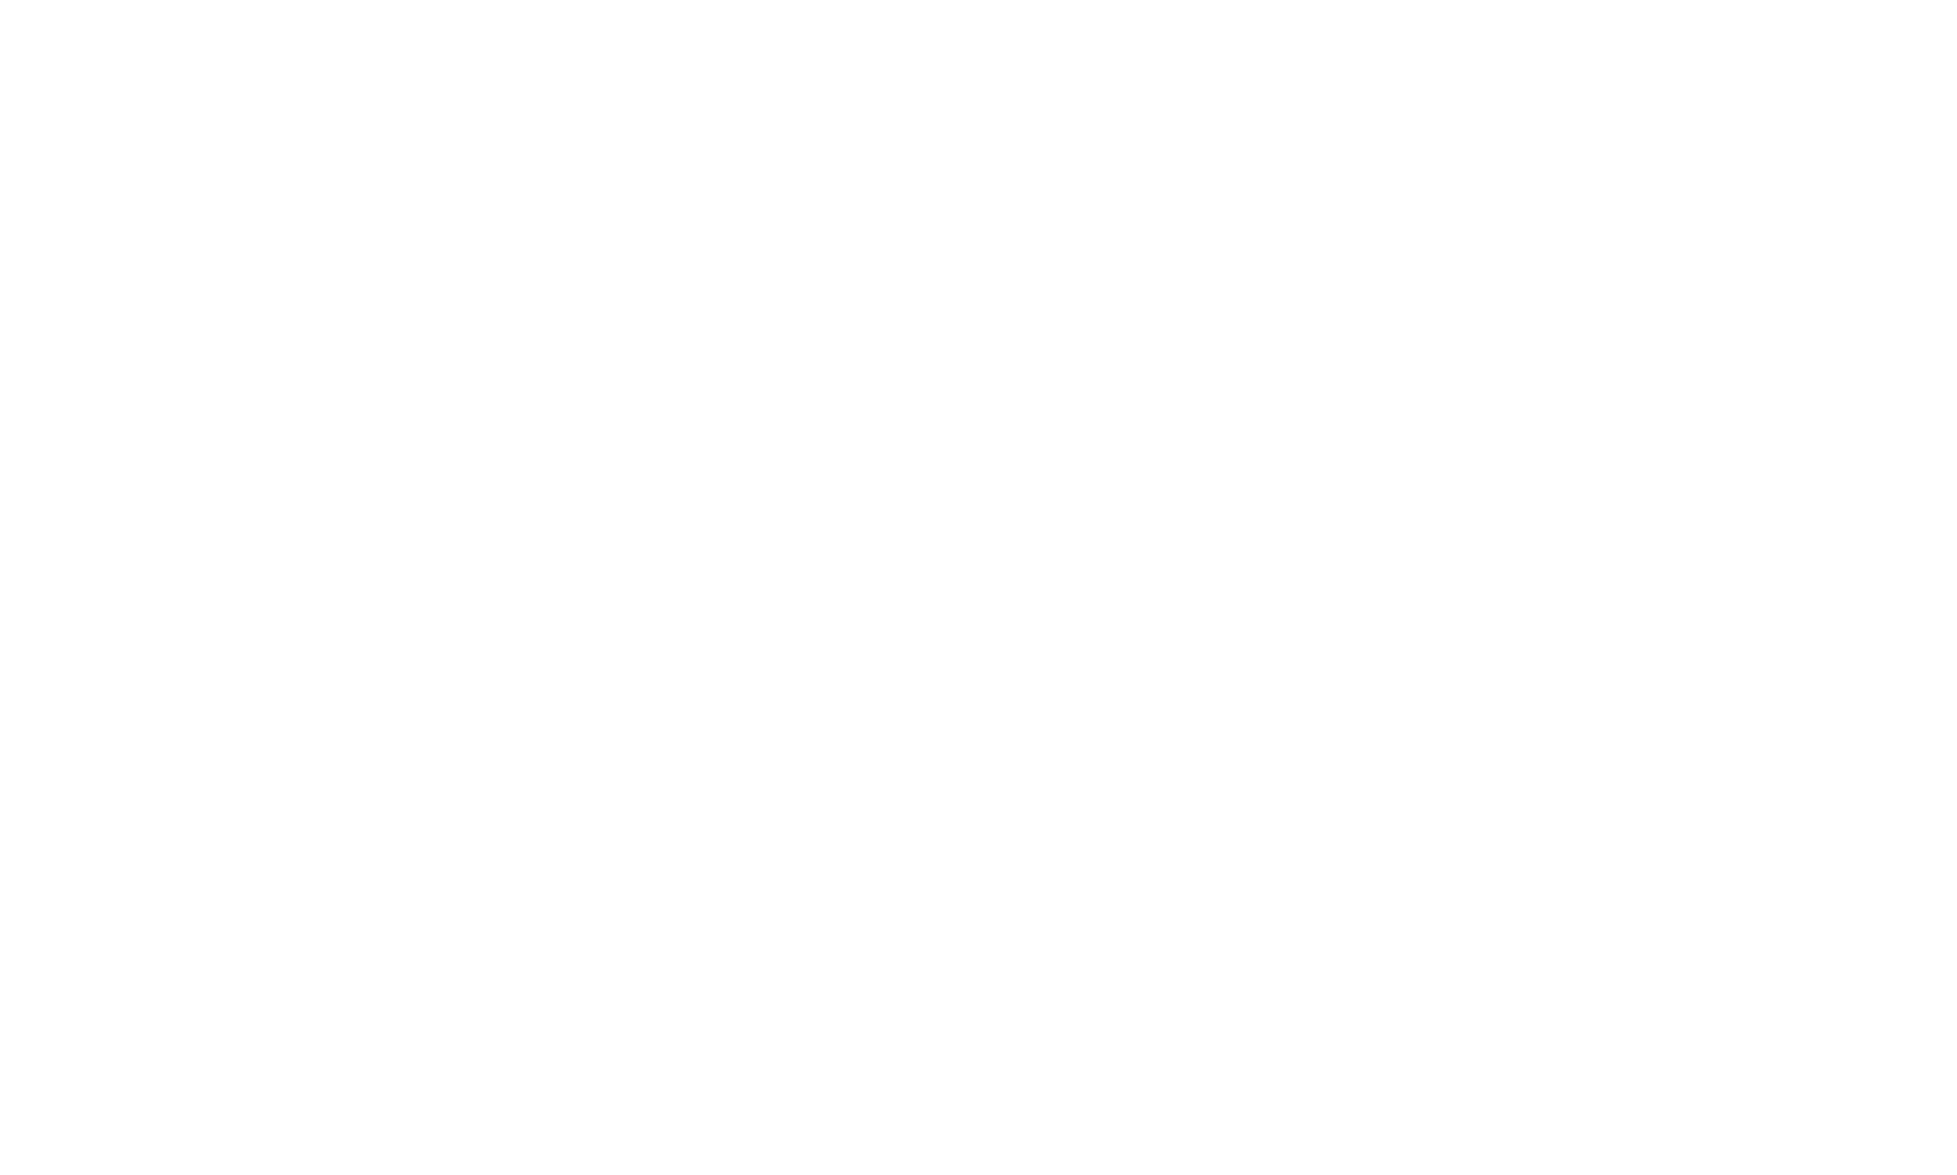

In [172]:
# Plot the max depths
plt.plot(max_depth_list,accuracy_scores)
plt.scatter(optimal_depth, max_accuracy, marker = 'x', color = 'red')
plt.title(f"Accuracy (F1 Score by Max Depth \n Optimal Tree Depth: {optimal_depth} (Accuracy: {round(max_accuracy,4)})")
plt.xlabel("Max Depth of Decision Tree")
plt.ylabel("Accuracy(F1 Score)")
plt.tight_layout()
plt.savefig('./Images/optimal_tree_depth.png', bbox_inches='tight');
plt.show()

# plot our model
plt.figure(figsize=(25,15))
tree = plot_tree(clf,
                 feature_names = X.columns,
                 filled = True,
                 rounded = True,
                 fontsize = 16)

The optimal tree depth is 8.

### Model 3 - Random Forest

Random Forest Model doesn't need to worry about outliers either.

In [77]:
# Split input variables and output variables
X = data.drop(['quality'], axis =1)
y = data['quality']

In [78]:
# Initiate train and test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state= 42,stratify = y)

#### Model Training

In [80]:
clf =RandomForestClassifier(random_state = 42, n_estimators = 500, max_features = 5)
clf.fit(X_train,y_train)

RandomForestClassifier(max_features=5, n_estimators=500, random_state=42)

#### Model Assessment

In [82]:
y_pred_class = clf.predict(X_test)
y_pred_prob = clf.predict_proba(X_test)[:,1]

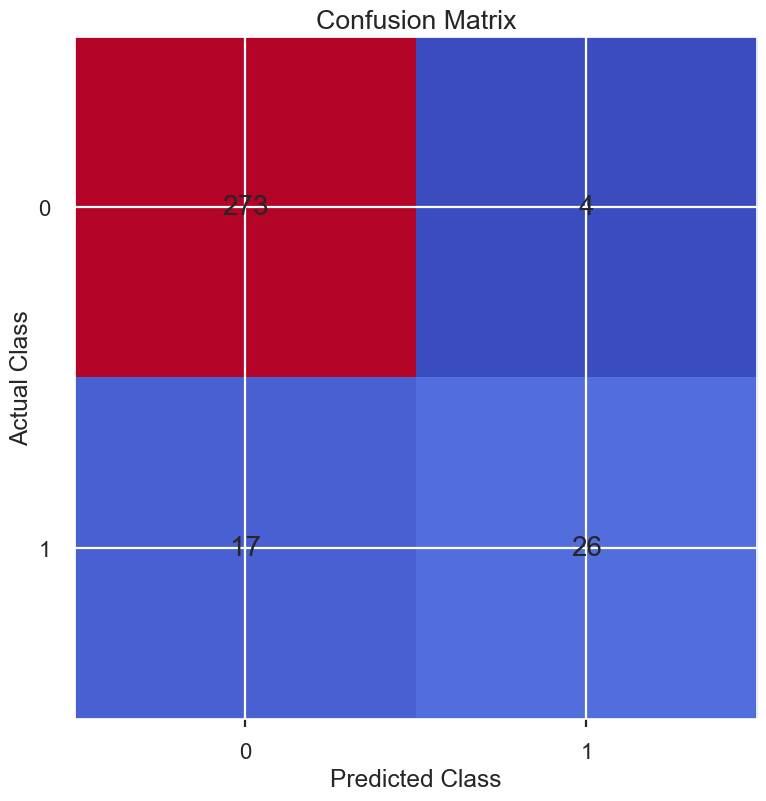

In [160]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred_class)

plt.style.use("seaborn-v0_8-poster")
plt.matshow(conf_matrix, cmap = 'coolwarm')
plt.gca().xaxis.tick_bottom()
plt.title('Confusion Matrix')
plt.ylabel("Actual Class")
plt.xlabel('Predicted Class')
for (i,j), corr_value in np.ndenumerate(conf_matrix):
    plt.text(j,i,corr_value, ha = 'center', va = 'center', fontsize = 20)
plt.savefig('./Images/conf_matrix_random.png', bbox_inches='tight');
plt.show()

In [84]:
scores = cal_score(y_test, y_pred_class)
scorecard.loc[len(scorecard)] = scores
scorecard

,Accuracy Score,Precision Score,Recall Score,F1 Score
0,0.8797,0.6190,0.3023,0.4062
1,0.9094,0.7500,0.4884,0.5915
2,0.9344,0.8667,0.6047,0.7123


Random Forecast model performs the best among the three algorithms with a F1 score of 0.71.

#### Feature Importance

Let's examine a high-quality wine has what kinds of features.

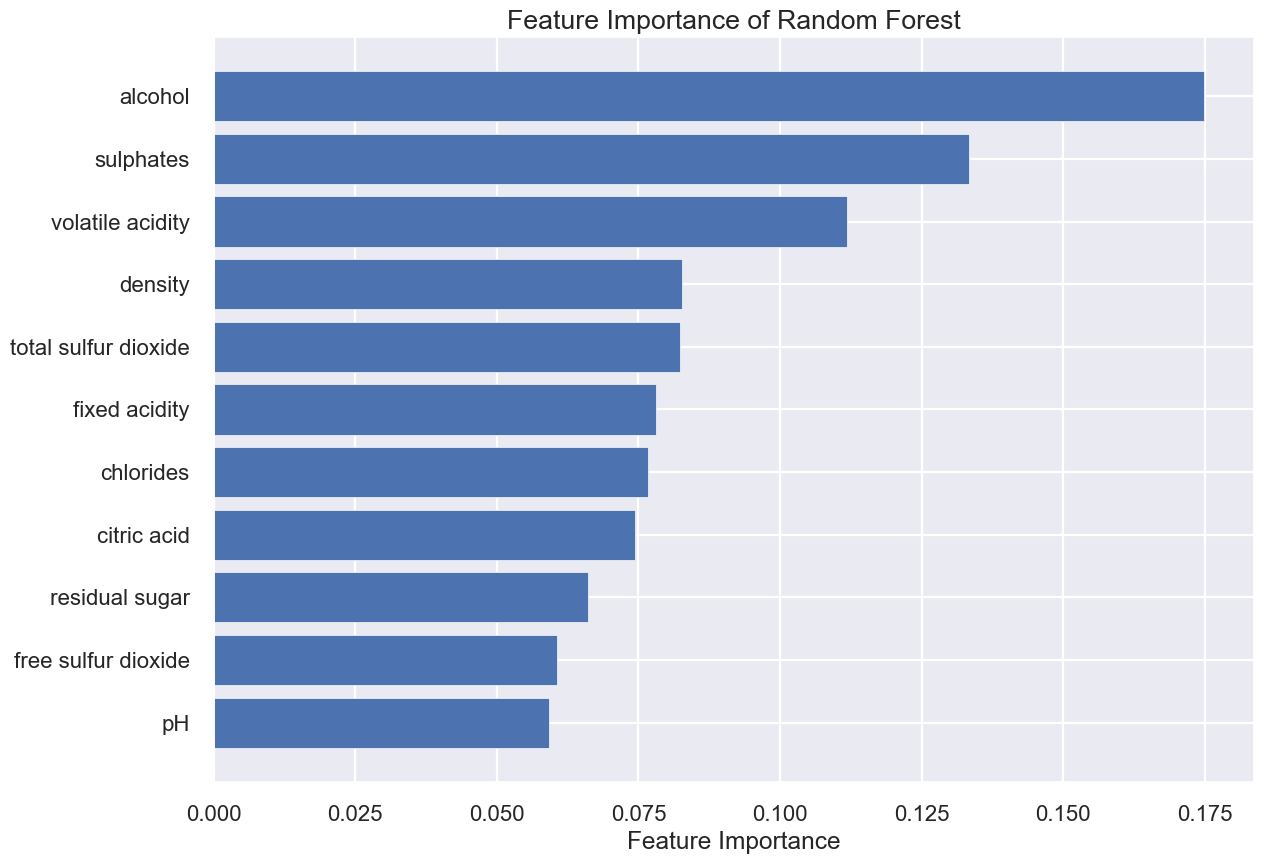

In [87]:
feature_importance = pd.DataFrame(clf.feature_importances_)
feature_names = pd.DataFrame(X.columns)
feature_importance_summary = pd.concat([feature_names, feature_importance], axis =1)
feature_importance_summary.columns = ['input_variable','feature_importance']
feature_importance_summary.sort_values(by = 'feature_importance', inplace = True)

plt.barh(feature_importance_summary['input_variable'], feature_importance_summary['feature_importance'])
plt.title('Feature Importance of Random Forest')
plt.xlabel("Feature Importance")
plt.tight_layout()
plt.savefig('./Images/feature_importance_random.png', bbox_inches='tight');
plt.show()

The top five important parameters for a high-quality wine are `alcohol`, `sulphates`,`volatile acidity`,`density`,`total sulfur dioxide`.

Let's further investigate how those features differentiate a "high-qulity" wine vs a "mediocre" wine.

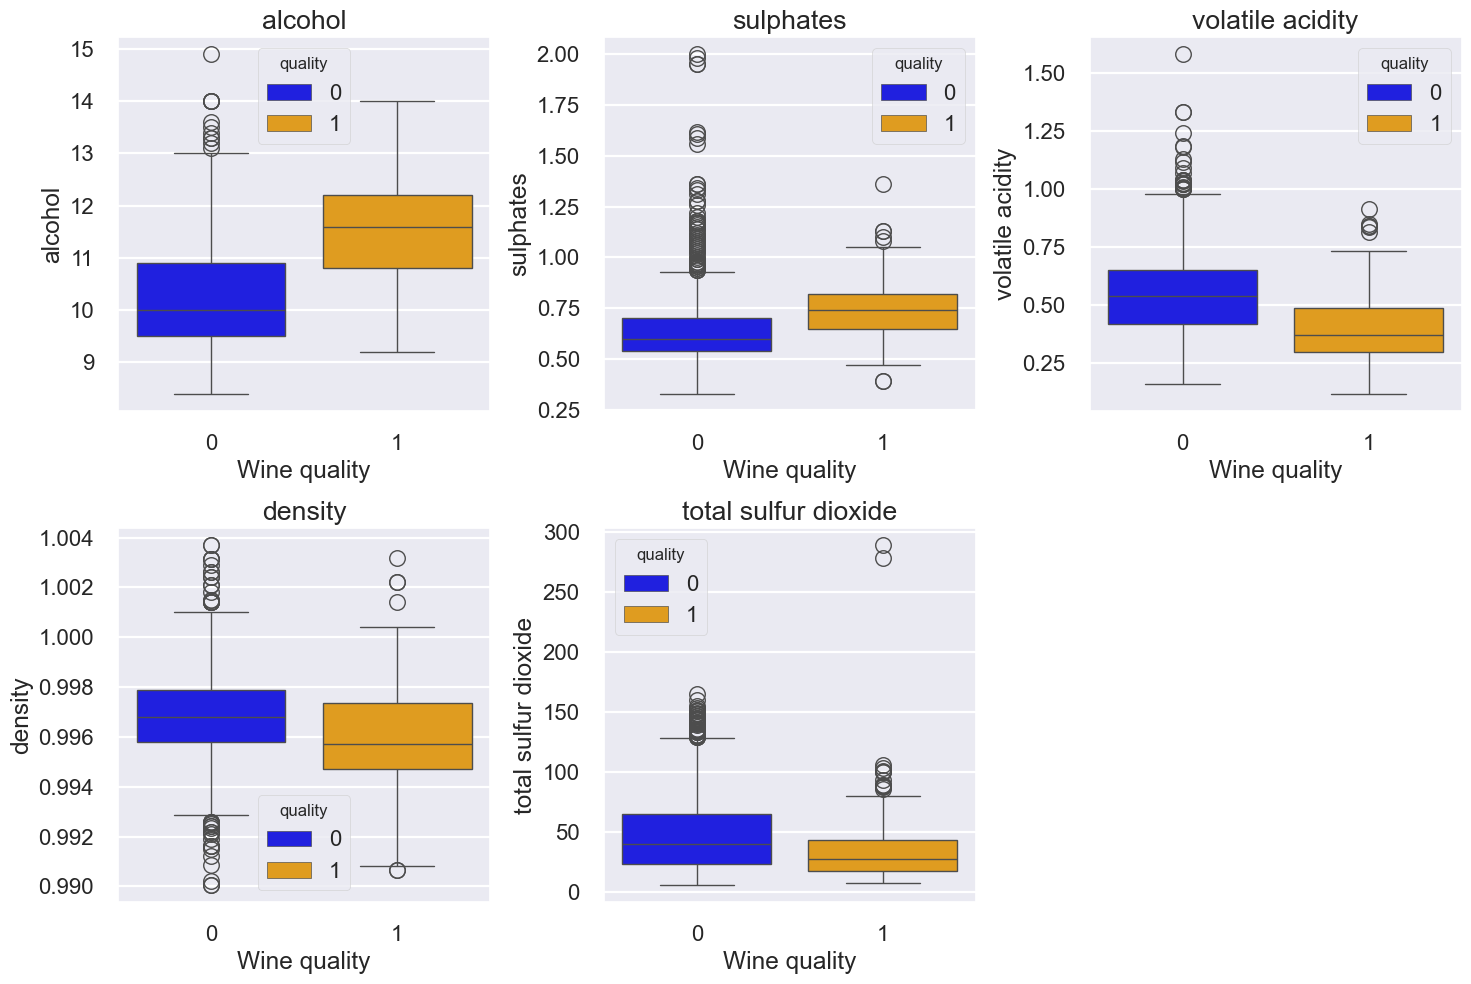

<Figure size 1280x880 with 0 Axes>

In [90]:
# Boxplots for the top five features split by wine quality
columns = ['alcohol','sulphates','volatile acidity','density','total sulfur dioxide']
color=['Blue','Orange']
plt.figure(figsize=(15, 10))

for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='quality', y=col, data=data,palette=color, hue=y)
    plt.title(f'{col}')
    plt.xlabel('Wine quality')
    plt.ylabel(col)

plt.tight_layout()
plt.show()
plt.savefig('./Images/features_quartile_distr_classif.png', bbox_inches='tight');

In [91]:
high_quality = data.loc[data['quality'] ==1]
low_quality = data.loc[data['quality'] ==0]

In [92]:
high_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.000000,217.0
mean,8.847005,0.405530,0.376498,2.708756,0.075912,13.981567,34.889401,0.996030,3.288802,0.743456,11.518049,1.0
std,1.999977,0.144963,0.194438,1.363026,0.028480,10.234615,32.572238,0.002201,0.154478,0.134038,0.998153,0.0
min,4.900000,0.120000,0.000000,1.200000,0.012000,3.000000,7.000000,0.990640,2.880000,0.390000,9.200000,1.0
25%,7.400000,0.300000,0.300000,2.000000,0.062000,6.000000,17.000000,0.994700,3.200000,0.650000,10.800000,1.0
50%,8.700000,0.370000,0.400000,2.300000,0.073000,11.000000,27.000000,0.995720,3.270000,0.740000,11.600000,1.0
75%,10.100000,0.490000,0.490000,2.700000,0.085000,18.000000,43.000000,0.997350,3.380000,0.820000,12.200000,1.0
max,15.600000,0.915000,0.760000,8.900000,0.358000,54.000000,289.000000,1.003200,3.780000,1.360000,14.000000,1.0


In [93]:
low_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.000000,1382.0
mean,8.236831,0.547022,0.254407,2.512120,0.089281,16.172214,48.285818,0.996859,3.314616,0.644754,10.251037,0.0
std,1.682726,0.176337,0.189665,1.415778,0.049113,10.467685,32.585604,0.001808,0.154135,0.170629,0.969664,0.0
min,4.600000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,0.0
25%,7.100000,0.420000,0.082500,1.900000,0.071000,8.000000,23.000000,0.995785,3.210000,0.540000,9.500000,0.0
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,39.500000,0.996800,3.310000,0.600000,10.000000,0.0
75%,9.100000,0.650000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.410000,0.700000,10.900000,0.0
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,2.000000,14.900000,0.0


Using the interquartile range (IQR) where most of the data lies to represent the desirable range of each parameter for the two wine classes. As we can see from the boxplot and the quartile statistics,  the high-quality wines is featured with 
* Higher alcohol - spreading within 10.8 and 12.2 with a median value of 11.6 as compared with low-quality wines spreading between  9.5 and 10.9 with a median value of 10.0.
* Higher sulphates - spreading between 0.65 and 0.86 with a median value of 0.74 vs low-quality wines spreading between 0.54 and 0.7 with a median value of 0.60.
* Lower volatile acidity spreading between 0.3 and 0.49 with an median value of 0.37 vs low-quality wines spreading between 0.42 and 0.65 with an median value of 0.54.
* Lower density spreading between 0.9947 and 0.9974 with a median value of 0.9957 vs low-quality wine between 0.9958 and 0.9979 with a median value 0.9968.
* Lower total sulfur dioxide spreading between 17 and 43 with a median value of 27 vs low-quality wines between 23 and 65 with an median value of 39.5.

#### Test with new data

In [96]:
new_data = [9.7,0.33,0.46,1.5,0.056,9,24,0.9970,3.22,0.82,10.3]

In [97]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

In [98]:
new_data = pd.DataFrame(new_data, columns).transpose()
new_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,9.7,0.33,0.46,1.5,0.056,9.0,24.0,0.997,3.22,0.82,10.3


In [99]:
y_pred_class_new_data = clf.predict(new_data)
y_pred_class_new_data

array([1], dtype=int64)

## Results and Insights

We applied three algorithms to predict the classification of wine quality. The best algorithm is the Random Forecast model where we can achieve an accuracy of 93.4%. Due to the inbalance of the dataset, Ww also use the F1 score to evaluate the model efficicacy as it balances both precision and recall. In Random Forest model, we achieve a F1 score of 71.2%.

We also identify the most important physiochemical properties for a high-quality red wine. Specifically, Riverwood Wine should focus on controlling the following five parameters - `alcohol`,`sulphates`,`volatile acidity`,`density`,`total sulfur dioxide`.

* Alcohol to control in a level between 10.8 and 12.2;
* Sulphates to control in a level between 0.65 and 0.86;
* Volatile acidity to control between 0.3 and 0.49;
* Density to control between  0.9947 and 0.9974;
* Total sulfur dioxide to control between 17 and 43.


### Next Steps

Further analyses could yield additional insights to further improve the prediction at Riverwood Wine.
    
- **Enlarge the sample size** - This dataset has only 1599 entires of the wine product with only ~230 classified as "high-quality". Enlarge the sample size will improve the predicative accuracy.

- **Analyse the interacted features** - Some physicochemical properties are interdependent. Build interaction features will improve the predicative power. 

- **Introduce the white wine dataset** - This model can be applied to dataset of white wine products. Compare and contrast the results from the two different products' dataset will yield additional insights around the common factors vs the product-specific factors so Riverwood can target the fermentation techniques to improve the wine quality.  